In [2]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import scipy.special as sp
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.optimizers import RMSprop
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split

Using Theano backend.


In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn.apionly as sns

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [25]:
class my_cb(Callback):
    def __init__(self):
        self.epoch = 0
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        print('.',end='')
        
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        print('\n')
        print("{0:3d} epochs: accuracy={1:5.4f}".format(self.epoch, logs['acc']))

In [26]:
# legge i dati in dataframe pandas
data = pd.read_csv("ex2data1.txt", header=0, delimiter=',', names=['x1','x2','t'])
# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t']).reshape(-1,1)

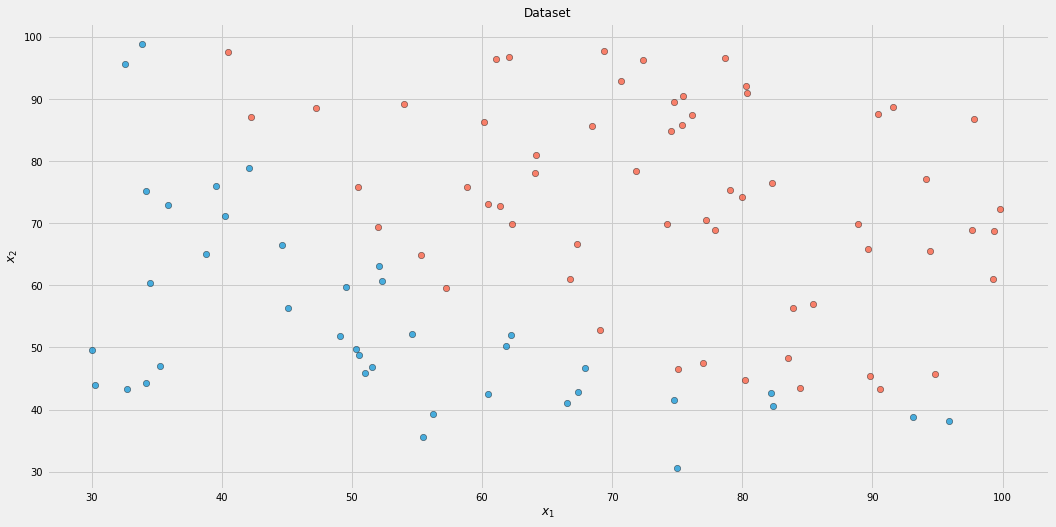

In [27]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, color=colors[0], edgecolor='k', alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40, color=colors[1], edgecolor='k', alpha=.7)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

In [28]:
num_classes = np.unique(t).shape[0]

In [29]:
t1 = to_categorical(t, num_classes)

In [30]:
delta1=max(X[:,0])-min(X[:,0])
delta2=max(X[:,1])-min(X[:,1])
min1=min(X[:,0])-delta1/10
max1=max(X[:,0])+delta1/10
min2=min(X[:,1])-delta2/10
max2=max(X[:,1])+delta2/10
u = np.linspace(min1, max1, 100)
v = np.linspace(min2, max2, 100)
u, v = np.meshgrid(u, v)

In [43]:
model0 = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model0.compile(optimizer=RMSprop(), loss='binary_crossentropy',
              metrics=['accuracy'])


In [44]:
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_20 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total para

In [45]:
batch_size = 10
epochs = 150

history = model0.fit(X, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0, callbacks=[my_cb()])

..........

  1 epochs: accuracy=0.5657
..........

  2 epochs: accuracy=0.6263
..........

  3 epochs: accuracy=0.6162
..........

  4 epochs: accuracy=0.6364
..........

  5 epochs: accuracy=0.6162
..........

  6 epochs: accuracy=0.6566
..........

  7 epochs: accuracy=0.6061
..........

  8 epochs: accuracy=0.6061
..........

  9 epochs: accuracy=0.6162
..........

 10 epochs: accuracy=0.6465
..........

 11 epochs: accuracy=0.6869
..........

 12 epochs: accuracy=0.6364
..........

 13 epochs: accuracy=0.6465
..........

 14 epochs: accuracy=0.6263
..........

 15 epochs: accuracy=0.6566
..........

 16 epochs: accuracy=0.6566
..........

 17 epochs: accuracy=0.6869
..........

 18 epochs: accuracy=0.6465
..........

 19 epochs: accuracy=0.6768
..........

 20 epochs: accuracy=0.6667
..........

 21 epochs: accuracy=0.6667
..........

 22 epochs: accuracy=0.6667
..........

 23 epochs: accuracy=0.6364
..........

 24 epochs: accuracy=0.6465
..........

 25 epochs: accuracy=0.6465


In [46]:
z = model0.predict(np.c_[u.ravel(), v.ravel()])

In [47]:
z = z[:,0].reshape(u.shape)

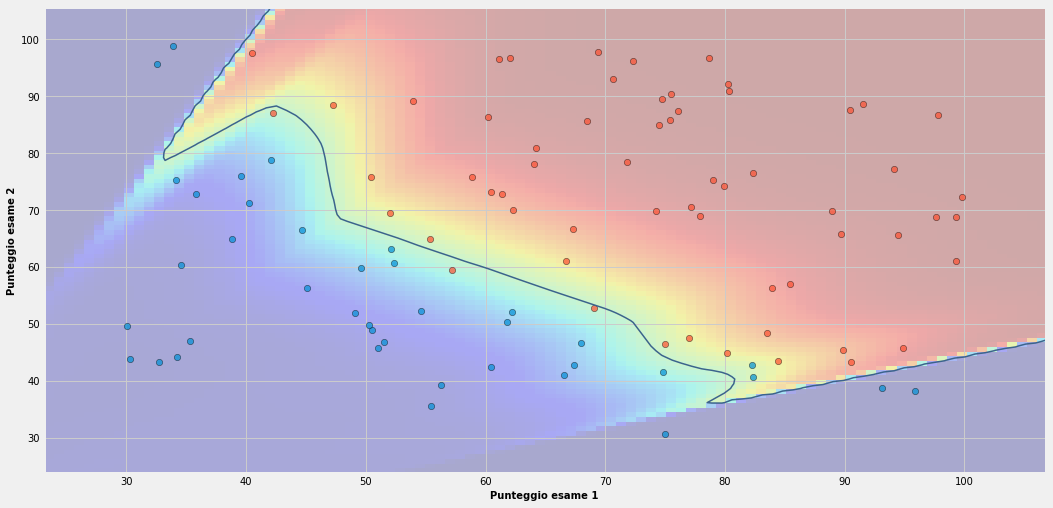

In [48]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
imshow_handle = plt.imshow(z, origin='lower', aspect='auto', extent=(min1, max1, min2, max2), alpha=.3)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, edgecolor='k', s=40, color=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, edgecolor='k', s=40, color=colors[1], alpha=.7)
plt.contour(u, v, z, [0.5], colors=[colors[8]], linewidths=[1.5])
plt.xlabel('Punteggio esame 1', fontsize=10)
plt.ylabel('Punteggio esame 2', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.show()

In [459]:
y = model0.predict(X)[:,0]

In [460]:
y = np.where(y>0.5, 1, 0)

In [461]:
cm = confusion_matrix(t,y)
cm

array([[38,  1],
       [ 7, 53]])

In [462]:
pr = precision_recall_fscore_support(t,y)

In [463]:
print('Classe 0: precision={0:5.3f}, recall={1:5.3f}'.format(pr[0][0], pr[1][0]))

print('Classe 1: precision={0:5.3f}, recall={1:5.3f}'.format(pr[1][0], pr[1][1]))

print('Accuracy={0:5.3f}'.format(accuracy_score(t,y)))

Classe 0: precision=0.844, recall=0.974
Classe 1: precision=0.974, recall=0.883
Accuracy=0.919
